In [1]:
import numpy as np
import pandas as pd
import scipy

In [3]:
df_segmentation = pd.read_csv('segmentation data.csv',index_col=0)

In [4]:
#shows the first data entries
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [6]:
#a quick tool for explorating data
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
#shows the correlation between features
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [9]:
#import seaborn visualization module
import seaborn as sns

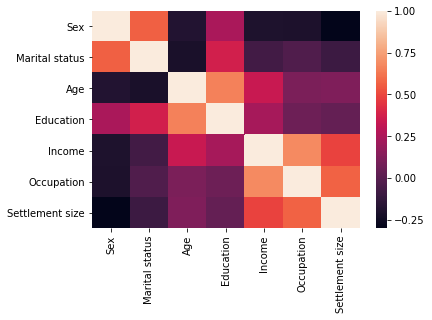

In [10]:
#correlation heatmap 
sns.heatmap(df_segmentation.corr())

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Income')

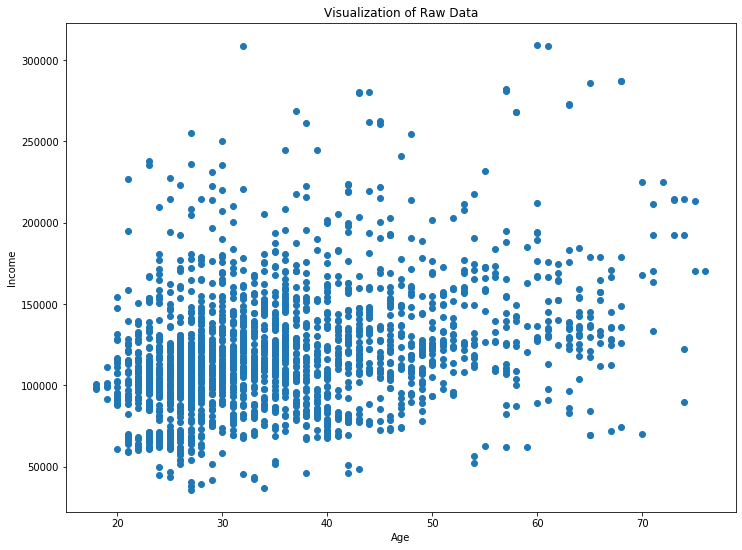

In [15]:
plt.figure(figsize=(12,9))
plt.scatter(x='Age',y='Income',data=df_segmentation)
plt.title('Visualization of Raw Data')
plt.xlabel('Age')
plt.ylabel('Income')

In [17]:
from sklearn.preprocessing import StandardScaler

In [141]:
scalar=StandardScaler()

In [142]:
segmtn_std=scalar.fit_transform(df_segmentation)

In [21]:
from scipy.cluster.hierarchy import dendrogram,linkage 

In [22]:
hier_clust = linkage(segmtn_std, method='ward')

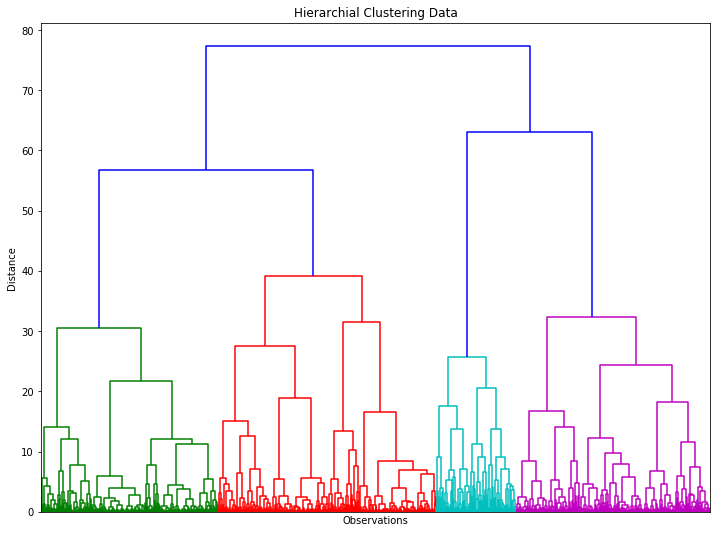

In [30]:
plt.figure(figsize=(12,9))
plt.title('Hierarchial Clustering Data')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,show_leaf_counts=False,no_labels=True,truncate_mode='level')
plt.show()

In [31]:
from sklearn.cluster import KMeans    re  msjbu   m jv ml

In [37]:
wcss =[]
for i in range(1,11):
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
        kmeans.fit(segmtn_std)
        wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

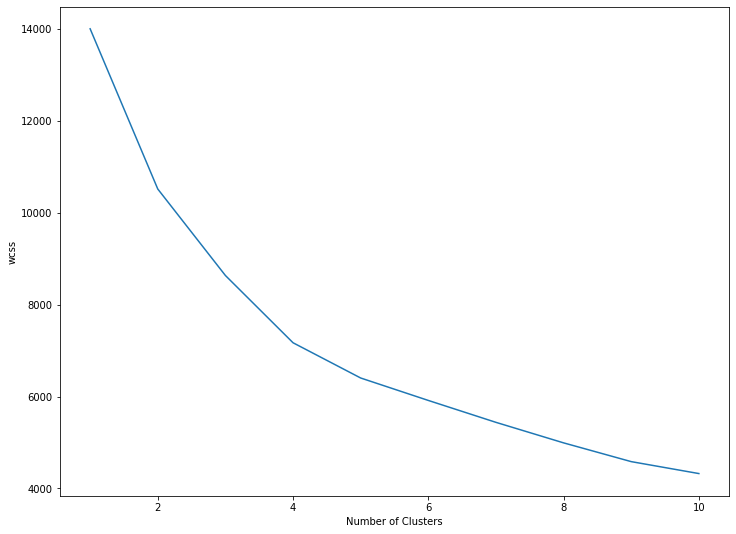

In [38]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

In [39]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=101)

In [40]:
kmeans.fit(segmtn_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [42]:
df_seg_kmeans=df_segmentation.copy()
df_seg_kmeans['Segment Kmeans']=kmeans.labels_

In [66]:
df_seg_anal=df_seg_kmeans.groupby(['Segment Kmeans']).mean()

In [67]:
df_seg_anal

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment Kmeans,,,,,,,
0,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061


In [78]:
df_seg_anal['N Obv']=df_seg_kmeans[['Segment Kmeans','Sex']].groupby(['Segment Kmeans']).count()

In [79]:
df_seg_anal

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obv
Segment Kmeans,,,,,,,,
0,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,461
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264


In [81]:
# or you could just have done /2000
df_seg_anal['Prp_osv']=df_seg_anal['N Obv']/df_seg_anal['N Obv'].sum()

In [82]:
df_seg_anal

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obv,Prp_osv
Segment Kmeans,,,,,,,,,
0,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,461,0.2305
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264,0.1320


In [85]:
df_seg_anal.rename({0:'Fewer Opportunities',1:'Standard',2:'Career Focused',3:'Rich'},inplace=True)

In [87]:
df_seg_kmeans['Label']=df_seg_kmeans['Segment Kmeans'].map({0:'Fewer Opportunities',1:'Standard',2:'Career Focused',3:'Rich'})

Text(0.5, 1.0, 'Segmentation K-means')

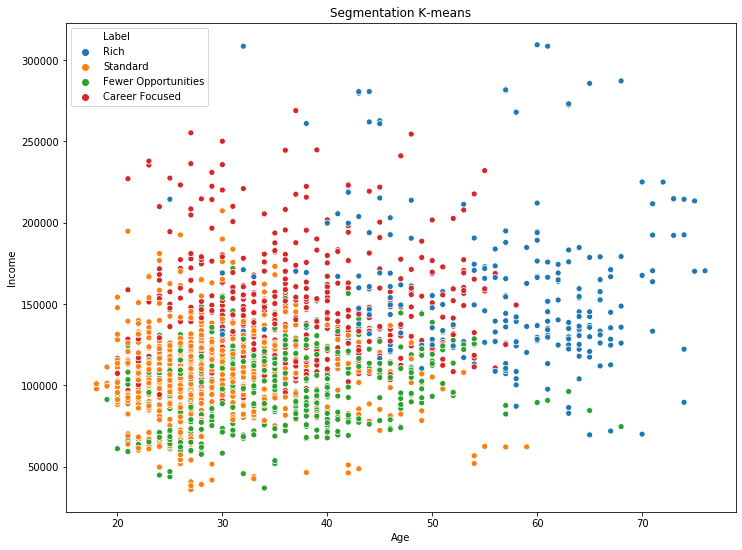

In [88]:
plt.figure(figsize=(12,9))
sns.scatterplot(df_seg_kmeans['Age'],df_seg_kmeans['Income'],hue=df_seg_kmeans['Label'])
plt.title('Segmentation K-means')

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca=PCA()

In [92]:
pca.fit(segmtn_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [93]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0.5, 1.0, 'Explained Variance by components')

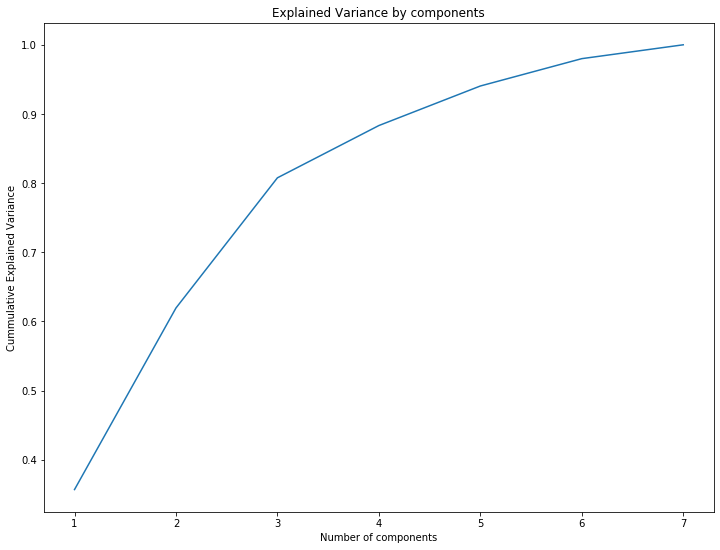

In [99]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cummulative Explained Variance')
plt.title('Explained Variance by components')

In [100]:
pca=PCA(n_components=3)

In [101]:
pca.fit(segmtn_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [102]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [105]:
df_pca_comp=pd.DataFrame(pca.components_,columns=df_segmentation.columns,index=['component 1','component 2','component 3'])

In [106]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


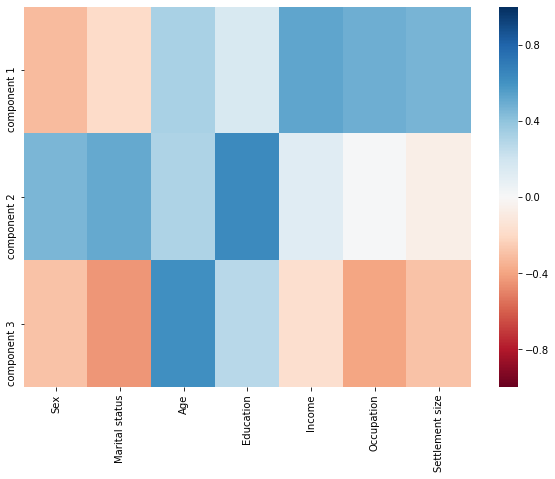

In [111]:
plt.figure(figsize=(10,7))
sns.heatmap(df_pca_comp,vmin=-1,vmax=1,cmap='RdBu')

In [113]:
scores_pca=pca.transform(segmtn_std)

In [114]:
wcss =[]
for i in range(1,11):
        kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=101)
        kmeans_pca.fit(scores_pca)
        wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'wcss')

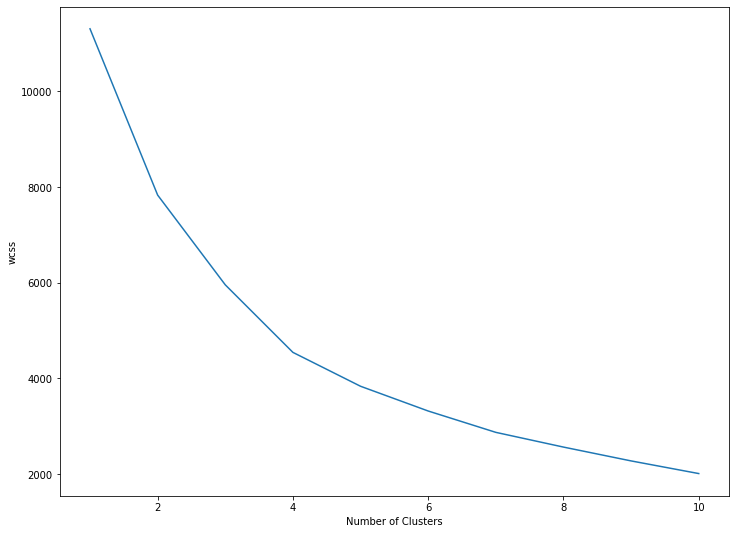

In [115]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

In [116]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=101)

In [117]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [119]:
df_segm_pca_kmeans=pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment KMeans pca']=kmeans_pca.labels_

In [120]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment KMeans pca
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,2
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,2
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,1
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1


In [123]:
df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby(['Segment KMeans pca']).mean()

In [124]:
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment KMeans pca,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
1,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
2,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [125]:
df_segm_pca_kmeans_freq['N Obv']=df_segm_pca_kmeans[['Segment KMeans pca','Sex']].groupby(['Segment KMeans pca']).count()
df_segm_pca_kmeans_freq['Prp_osv']=df_segm_pca_kmeans_freq['N Obv']/df_segm_pca_kmeans_freq['N Obv'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Fewer Opportunities',1:'Standard',2:'Career Focused',3:'Rich'})

In [126]:
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obv,Prp_osv
Segment KMeans pca,,,,,,,,,,,,
Fewer Opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
Career Focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Rich,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [127]:
df_segm_pca_kmeans['Legend']=df_segm_pca_kmeans['Segment KMeans pca'].map({0:'Fewer Opportunities',1:'Standard',2:'Career Focused',3:'Rich'})

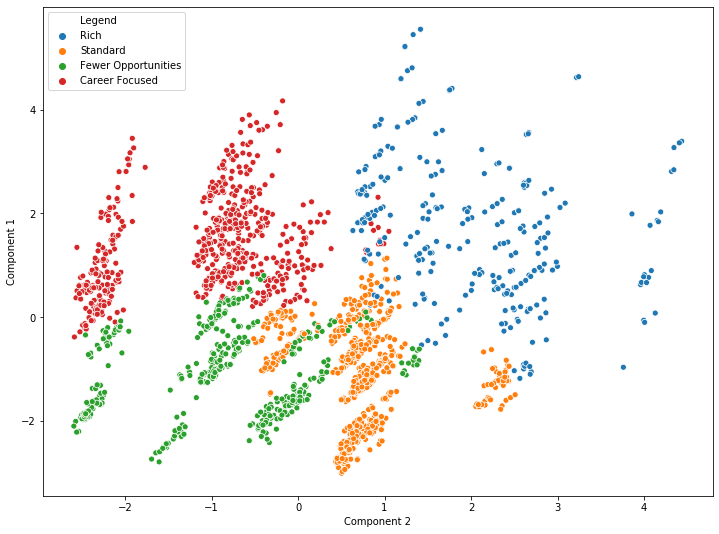

In [128]:
plt.figure(figsize=(12,9))
sns.scatterplot(df_segm_pca_kmeans['Component 2'],df_segm_pca_kmeans['Component 1'],hue=df_segm_pca_kmeans['Legend'])

In [133]:
import pickle

In [143]:
pickle.dump(scalar, open('scalar.pickle','wb'))

In [144]:
pickle.dump(pca, open('pca.pickle','wb'))

In [145]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))